# Clasificador Bayesiano - Recomendación Campaña

## Definición de requerimientos

Se requiere dar recomendación con respecto al uso que le dará determinada persona a los puntos de la tarjeta de crédito, dependiendo de una caracterización que se le realiza a la persona. Además, se cuenta con una base de conocimiento el cual está conformado por 4 columnas, las cuales son:

    - Tipo de ocupación (Empleado, Independiente)
    - Mayor a 30 (Si, No)
    - Volumen de compras (Bajo, Medio, Alto)
    - Mayoria de elementos comprados (Ferreteria, Mercado, Vestuario, entre otros)
    - Campaña (Hogar, viajes, salud, entre otros)

Los datos anteriores son los necesarios para efectuar la predicción, a excepción del atributo campaña, el cual es el que se va a predecir.

Además, el formato del archivo donde se encuentra almacenada la base de conocimiento es de tipo ".csv".

## Diseño
La solución se realizará en python, debido a que este lenguaje cuenta con los diversos métodos estadísticos para llevar a cabo la predicción. El método a utilizar será el teorema de Bayes, el cual nos dice la probabilidad de que un evento ocurra dada una determinada variable. Se implementarán bibliotecas como "pandas", para la manipulación y análisis de los datos; también, se usará el método Gaussiano para llevar a cabo la obtención de la distribución normal de los datos; unittest para la reallización de las pruebas unitarias.

En primera instancia se leerá el archivo ".csv", se hará la manipulación y transformación de los datos, para luego llevar a cabo la implementación de los métodos estadísticos para predicciones, y por último mostrar la predicción.


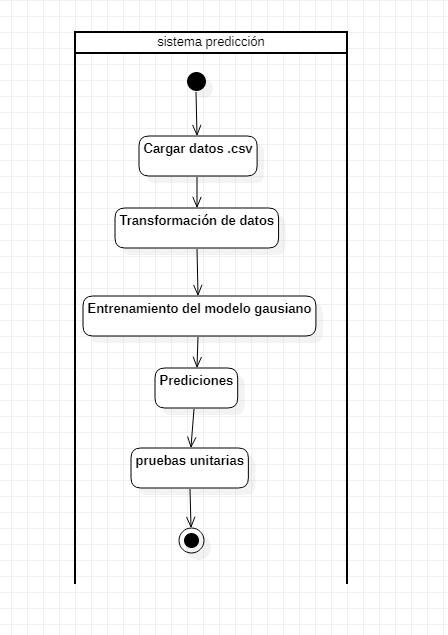

## Implementación y pruebas unitarias
Se importa la biblioteca de pandas, el cual se usará para la lectura, manipulación y transformación de los 
datos que se encuentran almacenados en el archivo.

In [12]:
import pandas as pd

In [13]:
Datos = pd.read_csv('Datos_Balegria.csv')
Datos.head(7)

,Tipo de Ocupación,Mayor a 30,Volumen de Compras,Mayoria de elementos comprados,Campaña
0,Empleado,Si,Alto,Ferretería,Salud
1,Independiente,Si,Medio,Vesturario,Hogar
2,Independiente,No,Alto,Vesturario,Viajes
3,Independiente,Si,Alto,Mercado,Hogar
4,Empleado,Si,Bajo,Mercado,Viajes
5,Empleado,Si,Medio,Vesturario,Salud
6,Empleado,No,Alto,Vesturario,Viajes


In [14]:
features_train = Datos.iloc[0:7,0:4]
target_train = Datos.iloc[0:7,4]
#print(label)

In [4]:
# Import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
f0=le.fit_transform(features_train.iloc[0:7,0])
f1=le.fit_transform(features_train.iloc[0:7,1])
f2=le.fit_transform(features_train.iloc[0:7,2])
f3=le.fit_transform(features_train.iloc[0:7,3])
label=le.fit_transform(target_train)
features=list(zip(f0,f1,f2,f3))
print(features)
print(label)

[(0, 1, 0, 0), (1, 1, 2, 2), (1, 0, 0, 2), (1, 1, 0, 1), (0, 1, 1, 1), (0, 1, 2, 2), (0, 0, 0, 2)]
[1 0 2 0 2 1 2]


In [17]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(features,label)
#Predicted = model1.predict([[0,0,0,2]])
#Predicted = model1.predict([[0,1,2,1]])
#Predicted = model1.predict([[0,0,2,1]])
#print(Predicted)

GaussianNB()

In [18]:
import unittest

class TestPrediction(unittest.TestCase):
    
    def test_1(self):
        self.assertEqual(model1.predict([[0,0,0,2]]), 2)
                         
    def test_2(self):
        self.assertEqual(model1.predict([[0,1,2,1]]), 1)
        
    def test_3(self):
        self.assertNotEqual(model1.predict([[0,1,2,1]]), 0)
        
if __name__=='__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_1 (__main__.TestPrediction) ... ok
test_2 (__main__.TestPrediction) ... ok
test_3 (__main__.TestPrediction) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


## Integración y sistemas de pruebas
Visualizando la solución de una manera escalable, es decir, la fuente de los datos no será un archivo ".csv", sino que la cantidad de datos a analizar van a ser mucho mayor; por lo tanto, dicha fuente se encontrará en una base de datos.

Así mismo, se puede obtener datos desde varias fuentes; sin embargo, se deberá llevar a cabo la unificación de los datos. Dicha unificación se realizará mediante ETL's, para llevar a cabo la extracción, transformación y carga de los datos; los datos ya limpios serán almacenados en una bodega de datos, la cual será consumida por la solución.

## Mantenimiento y operación
Se debe tener en cuenta que con el pasar del tiempo, a medida que los datos aumenten, se necesite mayor poder de procesamiento, entonces, el cambio a un servidor mas potente o más bien el alojamiento en la nube de los datos para que dichos datos se encuentren disponible 24/7, lo que es una de las características deseadas para cualquier software, brindarle al usuario información requerida al momento que él lo desee.
